**Import installed libraries and than use it and also For clean output plots**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import ttest_1samp, chi2_contingency
from scipy.integrate import odeint, solve_ivp
import warnings
warnings.filterwarnings("ignore")


#### Load Dataset for solving this assignment  

In [2]:
data = pd.read_csv("patient_data.csv")

# Show first 5 rows
data.head()

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


#### Handle Missing Values (if any)

In [3]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing CholesterolLevel with mean
data['CholesterolLevel'].fillna(data['CholesterolLevel'].mean(), inplace=True)


Missing values:
 PatientID           0
Gender              0
Age                 0
CholesterolLevel    0
BloodPressure       0
Region              0
RiskCategory        0
dtype: int64


#### Feature Selection with VarianceThreshold

In [4]:
# Apply VarianceThreshold to numeric columns
numeric_data = data.select_dtypes(include=np.number)
selector = VarianceThreshold()
data_var = selector.fit_transform(numeric_data)

# Print selected features
print("Remaining Features:",
      numeric_data.columns[selector.get_support()])


Remaining Features: Index(['PatientID', 'Age', 'CholesterolLevel', 'BloodPressure'], dtype='object')


#### Outlier Detection using Z-Score

In [5]:
# Detect outliers in CholesterolLevel
z_scores = np.abs(stats.zscore(data['CholesterolLevel']))
data = data[(z_scores < 3)]

# Check updated shape
print("Shape after removing outliers:", data.shape)

Shape after removing outliers: (100, 7)


#### Boxplot of Blood Pressure by Risk Category

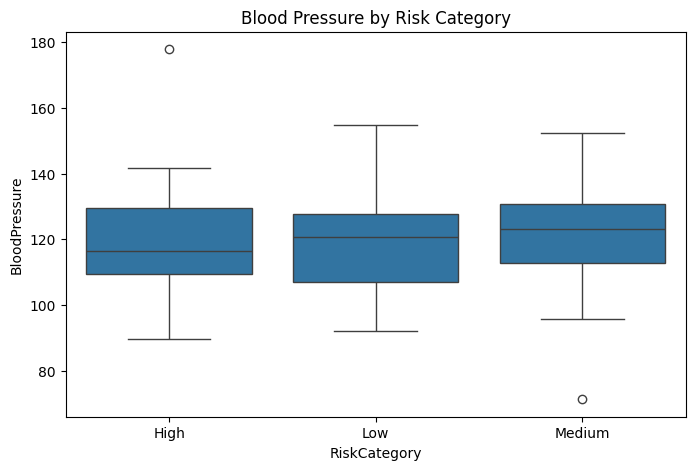

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='RiskCategory', y='BloodPressure', data=data)
plt.title("Blood Pressure by Risk Category")
plt.show()


#### Countplot by Region and RiskCategory

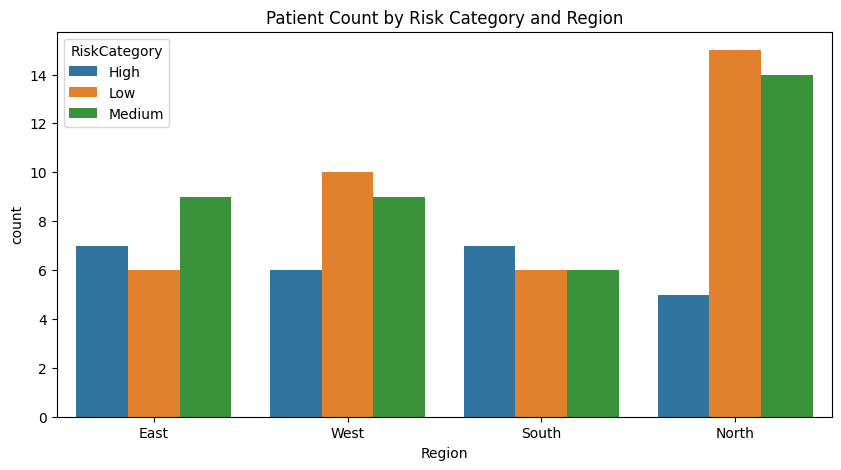

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Region', hue='RiskCategory', data=data)
plt.title("Patient Count by Risk Category and Region")
plt.show()


#### One-Sample T-Test (Cholesterol vs 200)

In [8]:
# One-Sample T-Test
sample = data['CholesterolLevel'].sample(20)
t_stat, p_val = ttest_1samp(sample, 200)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")
print("Null Hypothesis: μ = 200")
print("Alternative Hypothesis: μ ≠ 200")

if p_val < 0.05:
    print("Reject H0: The average CholesterolLevel is significantly different from 200 mg/dL.")
else:
    print("Fail to Reject H0: No significant difference from 200 mg/dL.")


T-statistic: 0.423, p-value: 0.677
Null Hypothesis: μ = 200
Alternative Hypothesis: μ ≠ 200
Fail to Reject H0: No significant difference from 200 mg/dL.


#### Chi-Square Test (Region vs RiskCategory)

In [9]:
# Chi-square test
contingency_table = pd.crosstab(data['Region'], data['RiskCategory'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2:.3f}, p-value: {p:.3f}")
print("Null Hypothesis: Region and RiskCategory are independent.")
print("Alternative Hypothesis: Region and RiskCategory are dependent.")

if p < 0.05:
    print("Reject H0: There is a significant relationship.")
else:
    print("Fail to Reject H0: No significant relationship.")


Chi2: 4.538, p-value: 0.604
Null Hypothesis: Region and RiskCategory are independent.
Alternative Hypothesis: Region and RiskCategory are dependent.
Fail to Reject H0: No significant relationship.


### ODE Model using odeint

In [10]:
# Medication level model using odeint
def model(C, t):
    k = 0.1
    D = 100
    dCdt = k * (D - C)
    return dCdt

t = np.linspace(0, 50, 100)
C0 = 0
C_odeint = odeint(model, C0, t)


#### ODE Model using solve_ivp

In [11]:
# Medication level model using solve_ivp
def model_ivp(t, C):
    k = 0.1
    D = 100
    return k * (D - C)

sol = solve_ivp(model_ivp, [0, 50], [0], t_eval=t)


#### Plot and Compare Both ODE Solutions

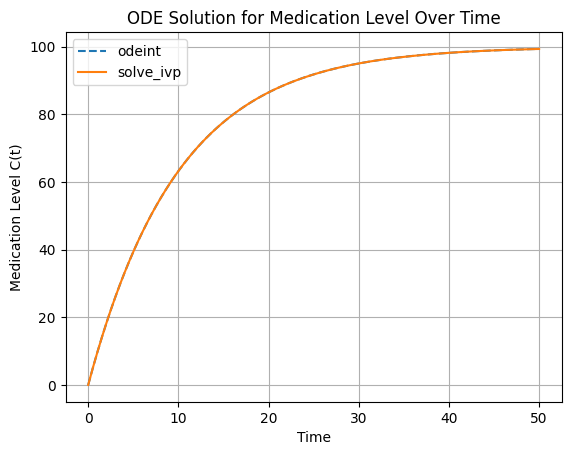

Both methods give similar results; solve_ivp provides more flexibility and is modern.


In [12]:
plt.plot(t, C_odeint, label='odeint', linestyle='--')
plt.plot(sol.t, sol.y[0], label='solve_ivp', linestyle='-')
plt.title("ODE Solution for Medication Level Over Time")
plt.xlabel("Time")
plt.ylabel("Medication Level C(t)")
plt.legend()
plt.grid(True)
plt.show()

print("Both methods give similar results; solve_ivp provides more flexibility and is modern.")


#### Save Your Cleaned Data

In [13]:
data.to_csv("cleaned_patient_data.csv", index=False)